In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset of credit cards
url = "https://raw.githubusercontent.com/MehmmetKandil/ml_course/main/credit_cards_data.csv"
df = pd.read_csv(url)

In [3]:
# Display the first rows of the dataset
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
# Knowing the Data
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
# summary statistics
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


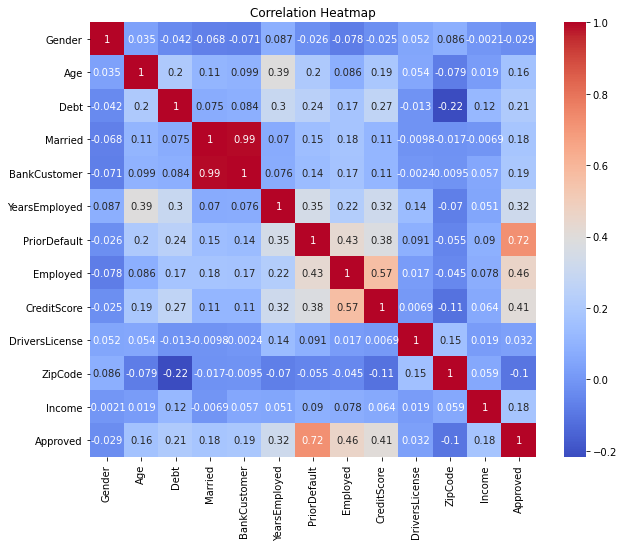

In [6]:
# Plot Heatmap that shows the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# '''
# * PriorDefault and Approved: There is a significant positive correlation of 0.72, 
#   indicating that applicants have no prior defaults are more likely to get approved.

# * CreditScore, Employed, and Approved: CreditScore has notable positive correlations with both Employed (0.57) and Approved (0.46), 
#   suggesting that higher credit scores are associated with employment status and approval rate.

# * BankCustomer and Married: There is a strong positive correlation of 0.99,
#   indicating these two features almost always occur together.'''

# '''
# * Features with high correlation with the target variable (Approved) like PriorDefault, CreditScore, and Employed
# could be given more importance. 

# * However, features that are highly correlated with each other, like BankCustomer and Married,
# might make the model unstable

# * So, I will exclude one of the two features either BankCustomer or Married.

# * In this case I will exclude Married which has low correlation with the target variable (Approved)'''

In [8]:
# drop Married feature
df = df.drop(['Married'], axis=1)

In [9]:
# for each of the categorical columns, lets see the unique values
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']
['White' 'Black' 'Asian' 'Latino' 'Other']
['ByBirth' 'ByOtherMeans' 'Temporary']


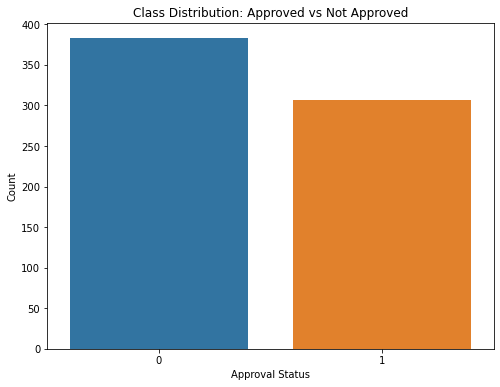

In [10]:
# Countplot for Class Distribution of target "Approved"
plt.figure(figsize=(8, 6))
sns.countplot(x='Approved', data=df)
plt.title('Class Distribution: Approved vs Not Approved')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.show()

In [11]:
# Data Preprocessing
# Separate target 'Approved' column from features
X = df.drop('Approved', axis=1)
y = df['Approved']

In [12]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Gender', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'])

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Model Training
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8043478260869565


Accuracy - Training Set: 0.8731884057971014
Accuracy - Test Set: 0.8043478260869565


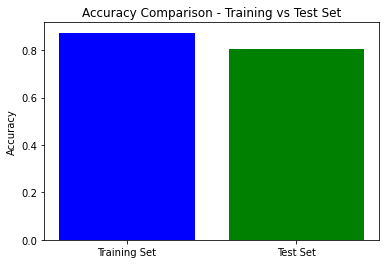

In [17]:
# Model Evaluation for train & test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy - Training Set:", accuracy_train)
print("Accuracy - Test Set:", accuracy_test)

# Plotting the results
labels = ['Training Set', 'Test Set']
accuracies = [accuracy_train, accuracy_test]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison - Training vs Test Set')
plt.ylabel('Accuracy')
plt.show()


Confusion Matrix:
 [[53 15]
 [12 58]]


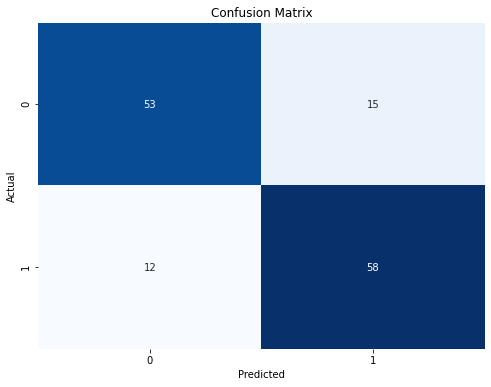

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)

# Print Confusion Matrix Output
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix Heatmap
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# Result Summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
# (True Positive + True Negative) / Total Predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
# True Positive / (True Positive + False Positive)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
# True Positive / (True Positive + False Negative)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
# 2 * ((Precision * Recall) / (Precision + Recall))
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.8043478260869565
Precision: 0.7945205479452054
Recall: 0.8285714285714286
F1 Score: 0.8111888111888111
